In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot #https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
f = r.TFile("./data/gm2offline_ana_version1.root")
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")

In [3]:
twest.Print()

******************************************************************************
*Tree    :eventTree : eventTree                                              *
*Entries :       82 : Total =        13237183 bytes  File  Size =    9967739 *
*        :          : Tree compression factor =   1.33                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :       82 : Total  Size=        895 bytes  File Size  =        104 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   3.90     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :       82 : Total  Size=        910 bytes  File Size  =        107 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   3.82     *
*...................................................

In [4]:
teast.Print()

******************************************************************************
*Tree    :eastTree  : eastTree                                               *
*Entries :   274505 : Total =        44170879 bytes  File  Size =   19871069 *
*        :          : Tree compression factor =   2.22                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :   274505 : Total  Size=    1101724 bytes  File Size  =       9358 *
*Baskets :       35 : Basket Size=      32000 bytes  Compression= 117.62     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :   274505 : Total  Size=    1101841 bytes  File Size  =       9427 *
*Baskets :       35 : Basket Size=      32000 bytes  Compression= 116.77     *
*...................................................

In [115]:
#stolen from https://cdcvs.fnal.gov/redmine/projects/gm2reconeast/repository/revisions/develop/entry/analyses/ReconstructionComparison_module.cc
reconEastCaloTimeCorrection = [-2.052, -2.352, -2.255, -2.244, -0.117, 0.707,  0.312,  0.064,
                                -0.542, -0.365, -0.641, -0.779,  0.158, 0.052, -0.370, -0.181,
                                -0.705, -0.945, -0.861, -0.851, -0.154, 0.000, -0.417,  0.218]
#recon east energy fudge factor
energyFudgeFactor = 1.10

Beginning entry 0
     Time, Energy: 9846.050102708408 612.4327249808175
     Positions:  1.8718337804213951 3.5
     CaloNum: 1
     1.0 Clusters within this time range
Beginning entry 1
     Time, Energy: 9895.117221743149 642.7437486942576
     Positions:  3.3780623525777322 3.538885980775877
     CaloNum: 1
     1.0 Clusters within this time range
Beginning entry 2
     Time, Energy: 10141.105389629995 1370.1129602587876
     Positions:  6.686437742317355 1.6049932272153613
     CaloNum: 1
     2.0 Clusters within this time range


Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hpos (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hpos (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hpos (Potential memory leak).


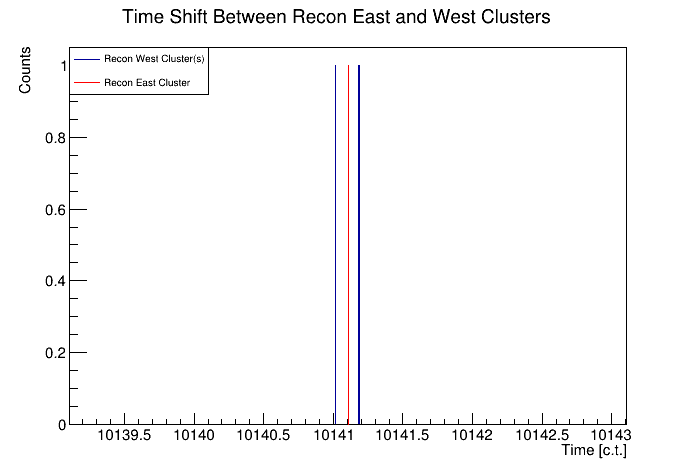

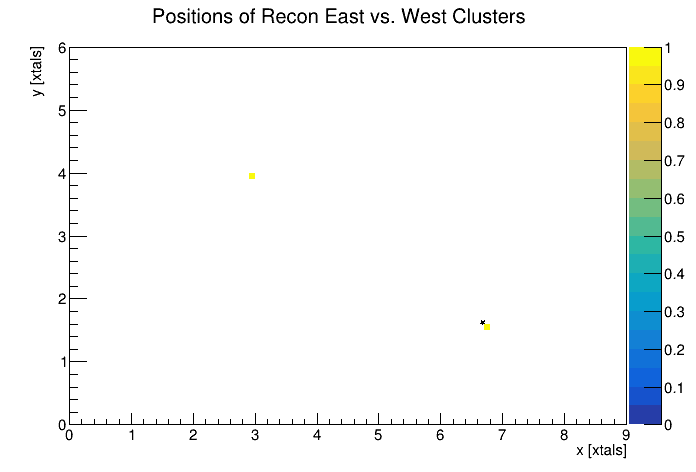

In [114]:
for i,entry in enumerate(teast):
    if i > 2: 
        break
    print("Beginning entry", i)
    print("     Time, Energy:", entry.time,entry.energy)
    print("     Positions: ", entry.position.first,entry.position.second)
    print("     CaloNum:", entry.calorimeterIndex)
    c = r.TCanvas()
    
    timecorrection = reconEastCaloTimeCorrection[entry.calorimeterIndex - 1]
    cut = "caloNum == "+str(entry.calorimeterIndex)+" && time < "+str(entry.time - timecorrection + 0.5 ) + " && time > " + str(entry.time - timecorrection - 0.5)
    
    h = r.TH1D("h","Time Shift Between Recon East and West Clusters; Time [c.t.];Counts",1000,entry.time-2,entry.time+2)
    
    twest.Draw("time"+str(timecorrection)+">>h", cut ,"goff")
    h.Draw()
    print("    ",h.GetEntries(),"Clusters within this time range")
    
    eastmarker = r.TLine((entry.time),0,(entry.time),1)
    eastmarker.SetLineColor(2)
    eastmarker.Draw()
    

    leg = r.TLegend(0.1,0.8,0.3,0.9)
    leg.AddEntry(h ,"Recon West Cluster(s)", "l")
    leg.AddEntry(eastmarker ,"Recon East Cluster", "l")
    leg.Draw()
    
    c.Draw()
    
    c2 = r.TCanvas()
    hpos = r.TH2D("hpos","Positions of Recon East vs. West Clusters; x [xtals]; y [xtals]",90,0,9,60,0,6)
    twest.Draw("y:x>>hpos",cut,"goff")    
    hpos.Draw("COLZ")
    
    poseast = r.TMarker(entry.position.first,entry.position.second,29)
    poseast.Draw("SAME")
    
    c2.Draw()
    
